# S03_T01_visualització_exploratòria

## Exercici 1. Resumeix gràficament el data set DelayedFlights.csv
Crea almenys una visualització per:
- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#limito càrrega de dades per tema de memòria
pd.options.display.max_rows = 100 
df = pd.read_csv("C:/Users/Silvia/Desktop/rubenIT/DelayedFlights/DelayedFlights.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

## 1. Visualització d'una variable categòrica (UniqueCarrier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UniqueCarrier  20 non-null     object
 1   Unnamed: 0     20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes
None
   UniqueCarrier  Unnamed: 0
0             9E       51885
1             AA      191865
2             AQ         750
3             AS       39293
4             B6       55315
5             CO      100195
6             DL      114238
7             EV       81877
8             F9       28269
9             FL       71284
10            HA        7490
11            MQ      141920
12            NW       79108
13            OH       52657
14            OO      132433
15            UA      141426
16            US       98425
17            WN      377602
18            XE      103663
19            YV       67063


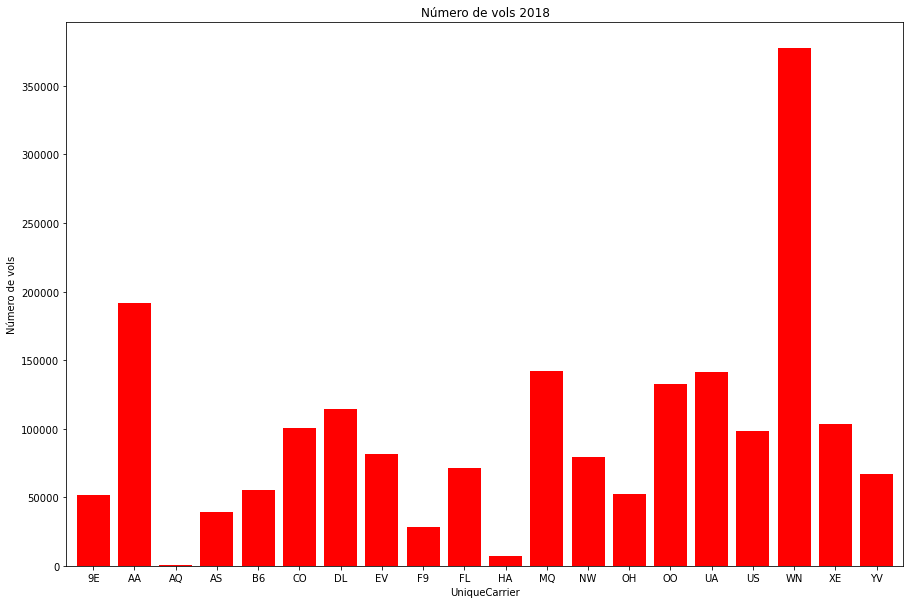

In [122]:
df01 = df.groupby(["UniqueCarrier"]).agg({"Unnamed: 0": "count"}).reset_index()
print(df01.info())
print(df01)
fig01=df01.plot(x="UniqueCarrier", kind="bar",legend=False,
          width=0.8,figsize=(15,10),color="r",title=str("Número de vols 2018"),
         sort_columns=True, rot=0)
plt.ylabel("Número de vols")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig01.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

## 2. Una variable numèrica (ArrDelay)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     12 non-null     int64  
 1   ArrDelay  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes
None
    Month   ArrDelay
0       1  7829035.0
1       2  8489280.0
2       3  8387816.0
3       4  6011045.0
4       5  5740952.0
5       6  9301334.0
6       7  8378980.0
7       8  6711297.0
8       9  3353316.0
9      10  3238415.0
10     11  3964659.0
11     12  9970905.0


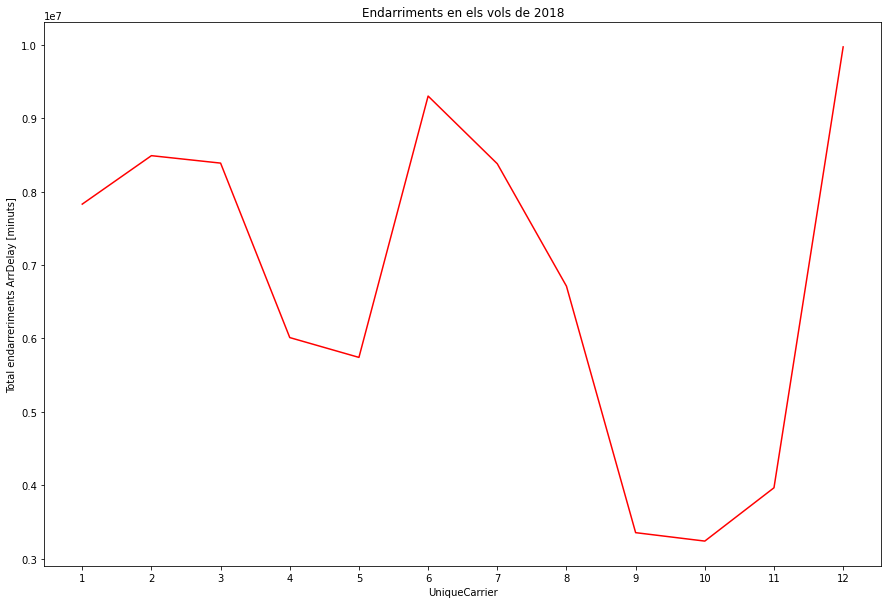

In [7]:
df02 = df.groupby(["Month"]).agg({"ArrDelay": "sum"}).reset_index()
print(df02.info())
print(df02)
fig02=df02.plot(x="Month",y="ArrDelay",legend=False,
          figsize=(15,10),color="r",title=str("Endarriments en els vols de 2018"),
          rot=0)
plt.ylabel("Total endarreriments ArrDelay [minuts]")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig02.jpg",bbox_inches='tight')
plt.xticks(range(1,13,1))
plt.show()
plt.close("all")

## 3. Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 9E to YV
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ArrDelay  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, WN to AQ
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ArrDelay  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes
None
                 ArrDelay
UniqueCarrier            
WN             11319092.0
AA              8889066.0
UA              6733013.0
MQ              6396704.0
OO              5978936.0
XE              5176042.0
DL              4535644.0
CO              4045932.0
EV              3888131.0
YV              3691461.0
US              3571867.0
NW              3462075.0
FL              3100150.0
B6              3025749.0
OH              2675993.0
9E              2420468.0
AS   

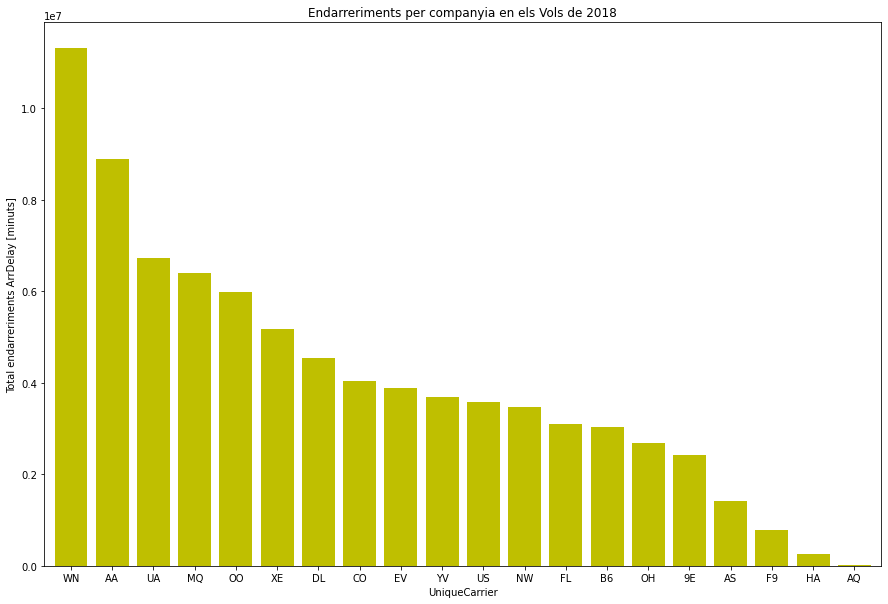

In [124]:
df03=df.groupby("UniqueCarrier")[["ArrDelay"]].sum()
df03.info()
df03.sort_values(by=["ArrDelay"], ascending=False, inplace=True)
print(df03.info())
print(df03)
fig03=df03.plot(kind="bar",legend=False,
          width=0.8,figsize=(15,10),color="y",title=str("Endarreriments per companyia en els Vols de 2018"),
         sort_columns=True, rot=0)
plt.ylabel("Total endarreriments ArrDelay [minuts]")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig03.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

## 4. Dues variables numèriques (ArrDelay i DepDelay)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     12 non-null     int64  
 1   ArrDelay  12 non-null     float64
 2   DepDelay  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 416.0 bytes
None
    Month   ArrDelay   DepDelay
0       1  7829035.0  7991808.0
1       2  8489280.0  8526839.0
2       3  8387816.0  8613154.0
3       4  6011045.0  6189462.0
4       5  5740952.0  5976172.0
5       6  9301334.0  9207070.0
6       7  8378980.0  8536193.0
7       8  6711297.0  7112267.0
8       9  3353316.0  3653060.0
9      10  3238415.0  3609786.0
10     11  3964659.0  4228051.0
11     12  9970905.0  9995374.0


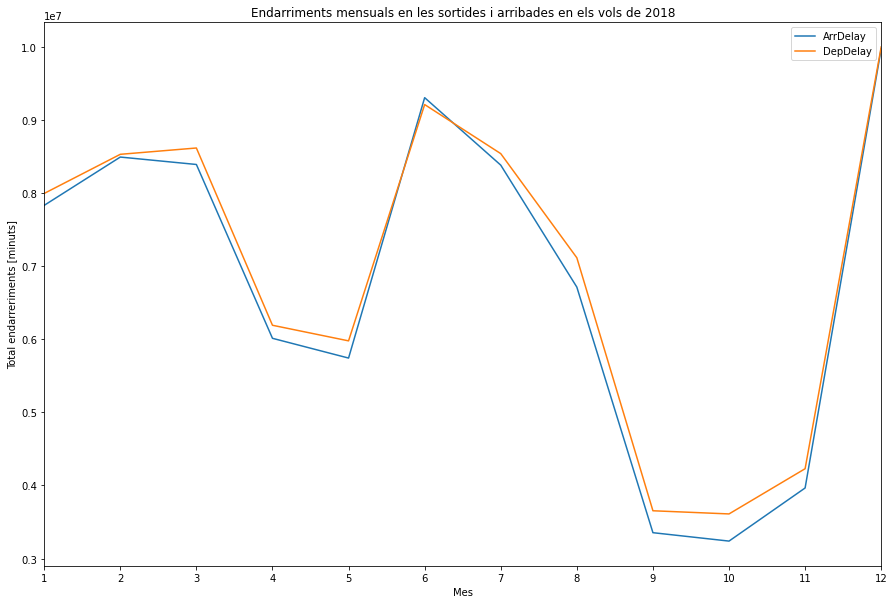

In [125]:
df04 = df.groupby(["Month"]).agg({"ArrDelay": "sum","DepDelay":"sum"}).reset_index()
print(df04.info())
print(df04)
fig04=df04.plot("Month",["ArrDelay","DepDelay"],legend=True,
          figsize=(15,10),title=str("Endarriments mensuals en les sortides i arribades en els vols de 2018"),
          rot=0)
plt.ylabel("Total endarreriments [minuts]")
plt.xlim(1,12)
plt.xlabel("Mes")
plt.xticks(range(1,13,1))
plt.savefig("C:/Users/Silvia/Desktop/fig04.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

## 5. Tres variables (ArrDelay, DepDelay i UniqueCarrier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueCarrier  20 non-null     object 
 1   ArrDelay       20 non-null     float64
 2   DepDelay       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 17 to 2
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueCarrier  20 non-null     object 
 1   ArrDelay       20 non-null     float64
 2   DepDelay       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes
None
   UniqueCarrier    ArrDelay    DepDelay
17            WN  11319092.0  13109808.0
1             AA   8889066.0   8918260.0
15            UA   6733013.0   7069279.0
11            MQ   6396704.0   6205622.0
14            OO   5978936.0   5

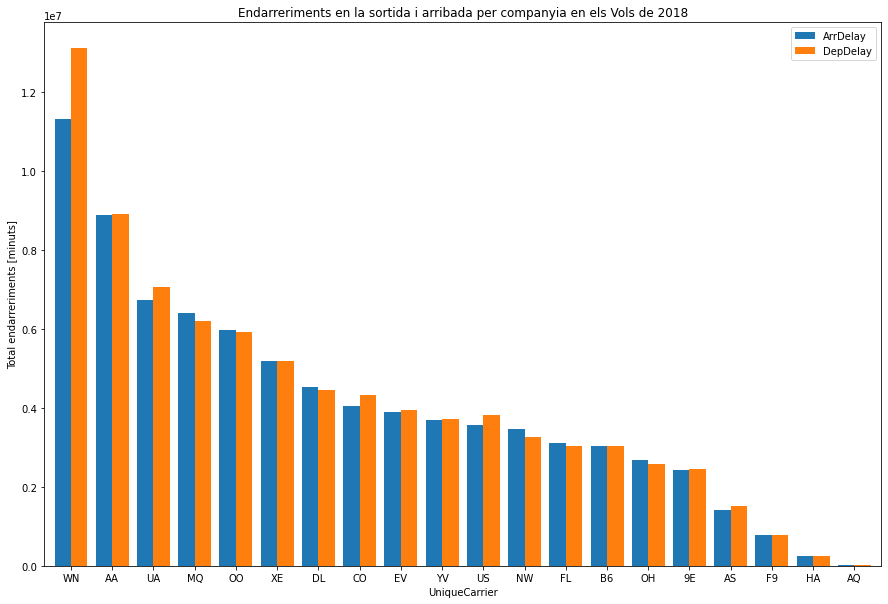

In [126]:
df05 = df.groupby(["UniqueCarrier"]).agg({"ArrDelay": "sum","DepDelay":"sum"}).reset_index()
df05.info()
df05.sort_values(by=["ArrDelay"], ascending=False, inplace=True)
print(df05.info())
print(df05)
fig05=df05.plot("UniqueCarrier",["ArrDelay","DepDelay"],kind="bar",
          legend=True,width=0.8,figsize=(15,10),
          title=str("Endarreriments en la sortida i arribada per companyia en els Vols de 2018"),sort_columns=True, rot=0)
plt.ylabel("Total endarreriments [minuts]")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig05.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   UniqueCarrier  object 
 1   ArrDelay       float64
 2   DepDelay       float64
dtypes: float64(2), object(1)
memory usage: 44.3+ MB
None
        UniqueCarrier  ArrDelay  DepDelay
0                  WN     -14.0       8.0
1                  WN       2.0      19.0
2                  WN      14.0       8.0
3                  WN      34.0      34.0
4                  WN      11.0      25.0
...               ...       ...       ...
1936753            DL      25.0      30.0
1936754            DL      75.0      57.0
1936755            DL      99.0      80.0
1936756            DL       9.0      11.0
1936757            DL      -5.0       7.0

[1936758 rows x 3 columns]


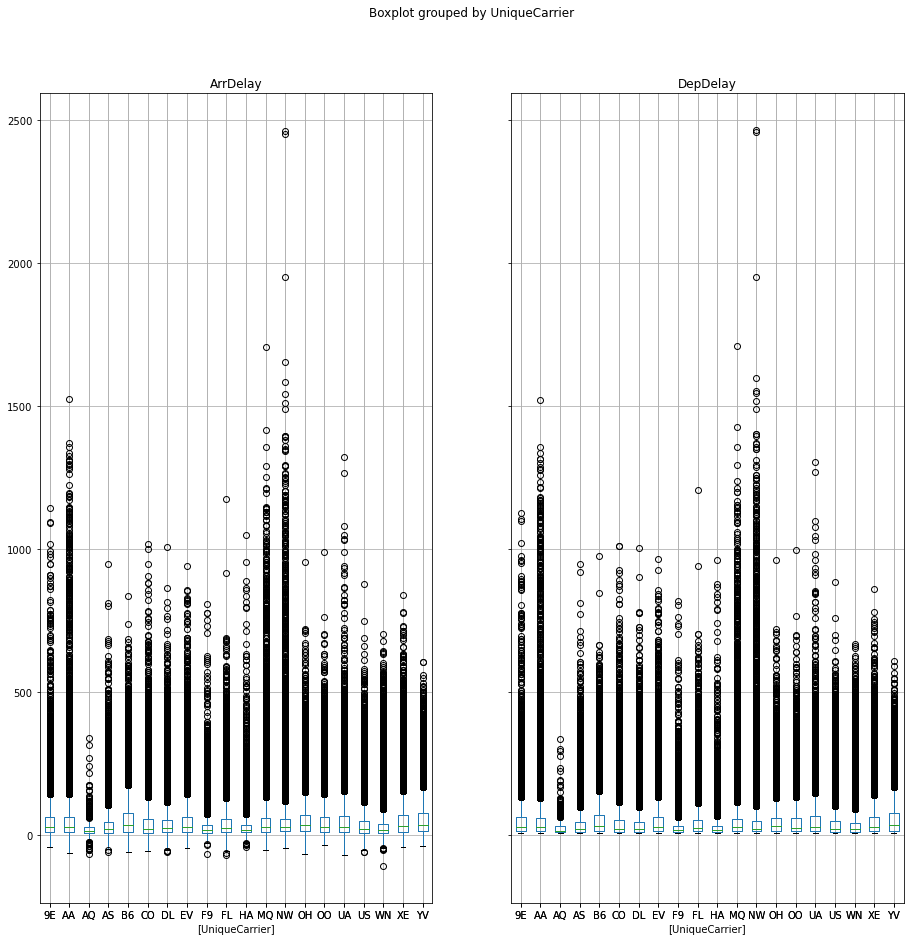

In [127]:
#Probo amb un gràfic boxplot
df511 = df.iloc[:,np.r_[9,15,16]]
print(df511.info())
print(df511)
boxplot511 = df511.boxplot(by="UniqueCarrier",figsize=(15,15))
plt.savefig("C:/Users/Silvia/Desktop/fig511.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

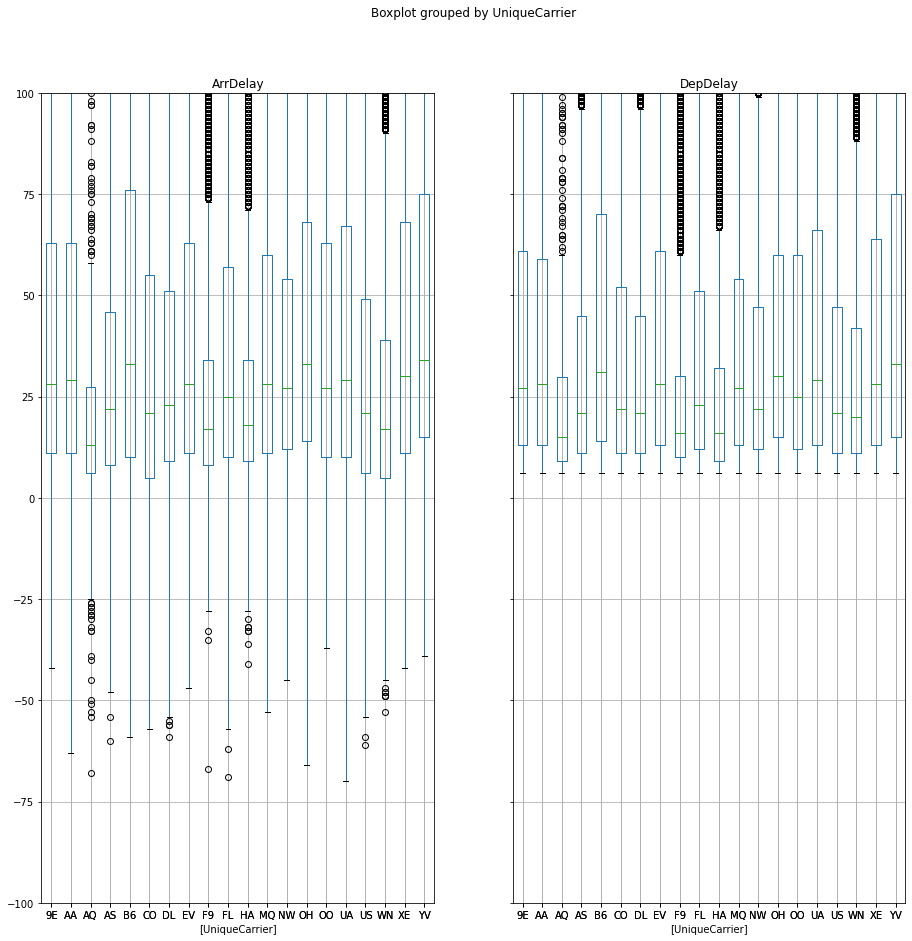

In [132]:
#Fem un zoom a l'eix Y per visualitzar millor la part dels quartils i la mitjana
boxplot5111 = df511.boxplot(by="UniqueCarrier",figsize=(15,15))
plt.ylim(-100,100)
plt.show()
plt.close("all")

## 6. Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueCarrier  20 non-null     object 
 1   ArrDelay       20 non-null     float64
 2   DepDelay       20 non-null     float64
 3   AirTime        20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 768.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 19 to 2
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniqueCarrier  20 non-null     object 
 1   ArrDelay       20 non-null     float64
 2   DepDelay       20 non-null     float64
 3   AirTime        20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes
None
   UniqueCarrier   ArrDelay   DepDelay     AirTime
19            YV  55.287049  55.430655   65.682098
4             B6  55.088739  55.030570  150.179

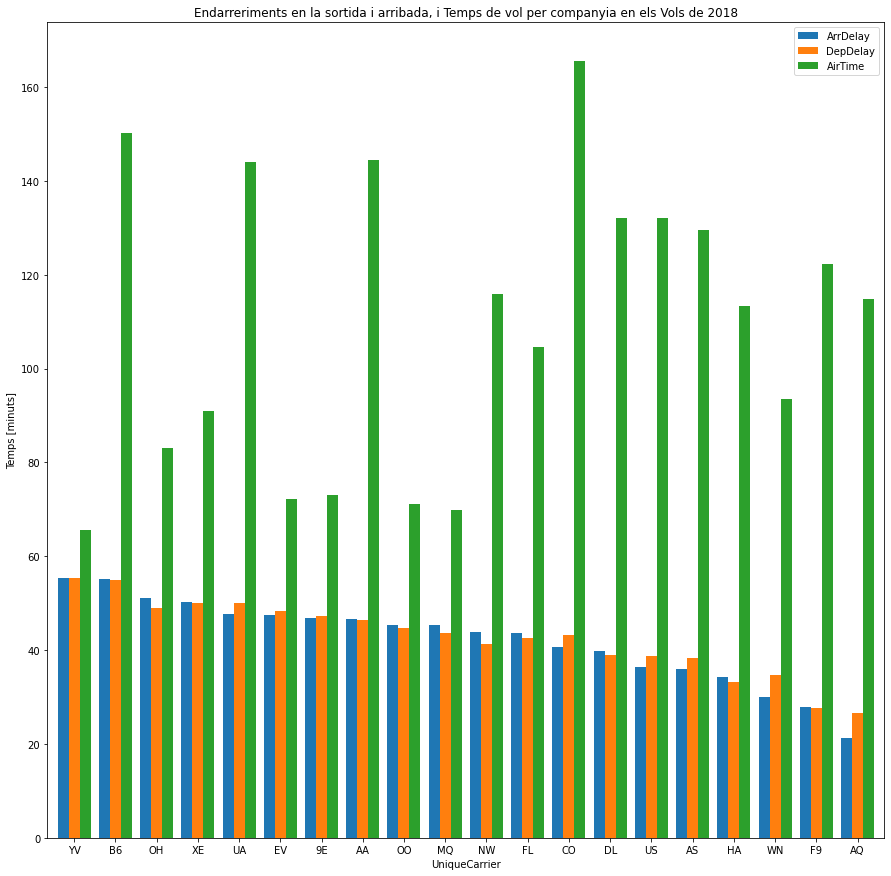

In [128]:
df06 = df.groupby(["UniqueCarrier"]).agg({"ArrDelay": "mean","DepDelay":"mean","AirTime":"mean"}).reset_index()
df06.info()
df06.sort_values(by=["ArrDelay"], ascending=False, inplace=True)
print(df06.info())
print(df06)
fig06=df06.plot("UniqueCarrier", ["ArrDelay","DepDelay","AirTime"], kind="bar",figsize=(15,15),
          width=0.8,title=str("Endarreriments en la sortida i arribada, i Temps de vol per companyia en els Vols de 2018"),
          rot=0)
plt.ylabel("Temps [minuts]")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig06.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

# Exercici 2. Exporta els gràfics com imatges o com html.

S'aplica plt.savefig("C:/Users/Silvia/Desktop/fig01.jpg",bbox_inches='tight') per a cada una de les figures, i es guarden les imatges a l'escriptori o repositori escollit.

# Exercici 3. Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Year                 int64  
 2   Month                int64  
 3   DayofMonth           int64  
 4   DayOfWeek            int64  
 5   DepTime              float64
 6   CRSDepTime           int64  
 7   ArrTime              float64
 8   CRSArrTime           int64  
 9   UniqueCarrier        object 
 10  FlightNum            int64  
 11  TailNum              object 
 12  ActualElapsedTime    float64
 13  CRSElapsedTime       float64
 14  AirTime              float64
 15  ArrDelay             float64
 16  DepDelay             float64
 17  Origin               object 
 18  Dest                 object 
 19  Distance             int64  
 20  TaxiIn               float64
 21  TaxiOut              float64
 22  Cancelled            int64  
 23  CancellationCode     object 
 24

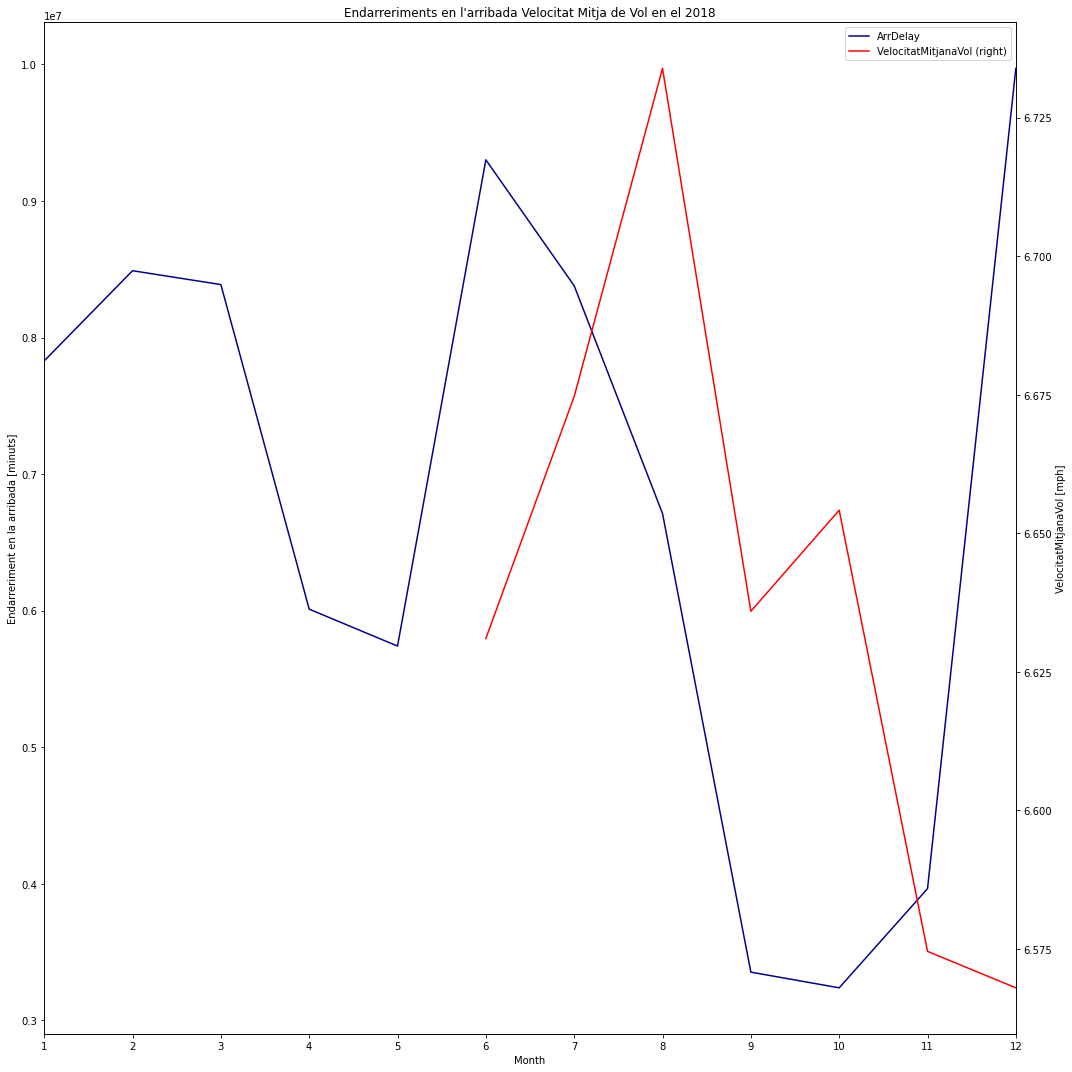

In [14]:
# Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
df2503=df.assign(VelocitatMitjanaVol=df["Distance"]/df["AirTime"])
#df03=df02.assign(ArribaTard="Sí" if ["ArrDelay"]>0)
df2503["ArribaTard"] = df["ArrDelay"].apply(lambda x: "Yes" if x > 0 else "No")

print(df2503.info())




df2504 = df2503.groupby(["Month"]).agg({"ArrDelay": "sum","VelocitatMitjanaVol":"mean"}).reset_index()
print(df2504.info())
print(df2504)


ax=df2504.plot(kind="line", x="Month", y="ArrDelay", color='DarkBlue')

ax2=df2504.plot(kind="line", x="Month", y="VelocitatMitjanaVol", secondary_y=True,color='Red', ax=ax, figsize=(15,15), 
                title=str("Endarreriments en l'arribada Velocitat Mitja de Vol en el 2018"))

ax.set_ylabel("Endarreriment en la arribada [minuts]")
ax2.set_ylabel("VelocitatMitjanaVol [mph]")
plt.tight_layout()
plt.xlim(1,12)
plt.xlabel("Mes")
plt.xticks(range(1,13,1))
plt.savefig("C:/Users/Silvia/Desktop/fig2504.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 9E to YV
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ArrDelay  20 non-null     float64
dtypes: float64(1)
memory usage: 320.0+ bytes
                 ArrDelay
UniqueCarrier            
WN             11319092.0
AA              8889066.0
UA              6733013.0
MQ              6396704.0
OO              5978936.0
XE              5176042.0
DL              4535644.0
CO              4045932.0
EV              3888131.0
YV              3691461.0
US              3571867.0
NW              3462075.0
FL              3100150.0
B6              3025749.0
OH              2675993.0
9E              2420468.0
AS              1406735.0
F9               788549.0
HA               255613.0
AQ                15814.0


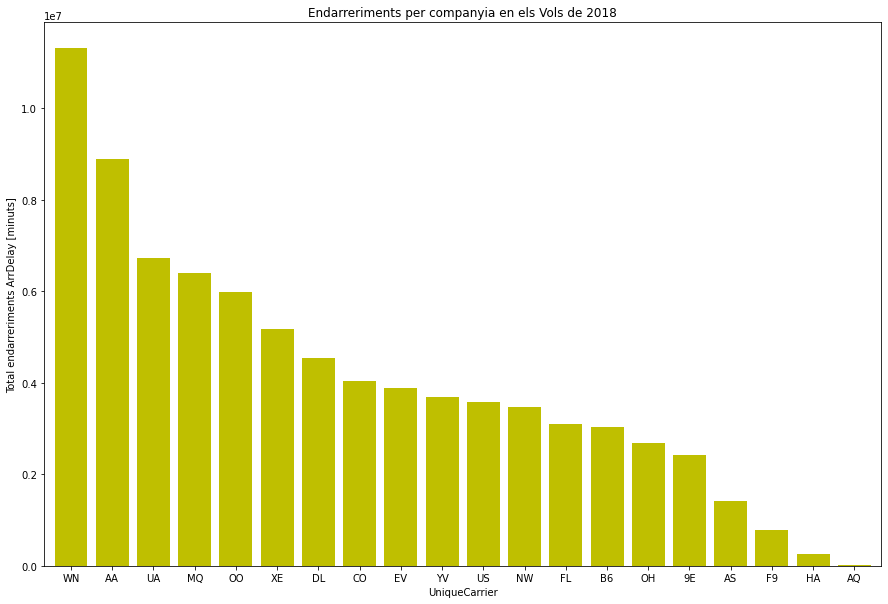

In [17]:
# Taula de les aerolínies amb més endarreriments acumulats
df2510=df2503.groupby("UniqueCarrier")[["ArrDelay"]].sum()
df2510.info()
df2510.sort_values(by=["ArrDelay"], ascending=False, inplace=True)
print(df2510)


fig2510=df2510.plot(kind="bar",legend=False,
          width=0.8,figsize=(15,10),color="y",title=str("Endarreriments per companyia en els Vols de 2018"),
         sort_columns=True, rot=0)
plt.ylabel("Total endarreriments ArrDelay [minuts]")
plt.xlabel("UniqueCarrier")
plt.savefig("C:/Users/Silvia/Desktop/fig2510.jpg",bbox_inches='tight')
plt.show()
plt.close("all")

        UniqueCarrier  AirTime
1488690            HA   1091.0
1367047            HA    733.0
362529             CO    664.0
556381             CO    655.0
556385             CO    654.0
...               ...      ...
186343             WN      2.0
331502             9E      2.0
56309              OO      2.0
53537              OO      2.0
53538              OO      2.0

[1928355 rows x 2 columns]
El vol més llarg és: UniqueCarrier        YV
AirTime          1091.0
dtype: object
El vol més curt és: UniqueCarrier     9E
AirTime          2.0
dtype: object


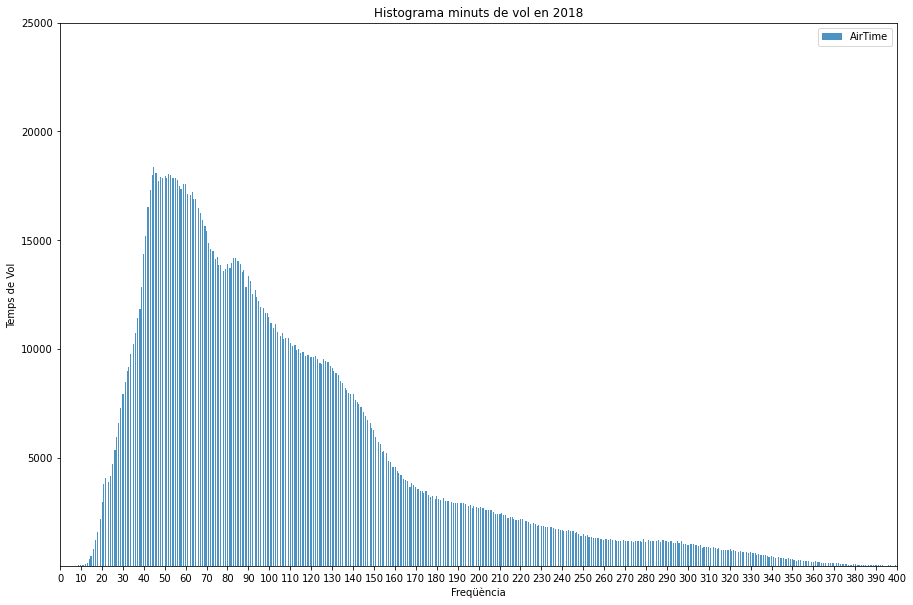

In [65]:
# Quins són els vols més llargs? I els més endarrerits?
df2505=df.iloc[:,np.r_[9, 14]]
filtre = df2505["AirTime"] > 1
df2506 = df2505[filtre]
print(df2506.sort_values(by="AirTime", ascending=False))
print("El vol més llarg és: " + str(df2506.max()))
print("El vol més curt és: " + str(df2506.min()))


plt.figure(figsize=(15,10))
plt.hist(df2506["AirTime"],bins=2000,alpha=0.8,label="AirTime",linewidth=2)
plt.legend()
plt.xlim(0,400)
plt.ylim(1,25000)
plt.xlabel("Freqüència")
plt.ylabel("Temps de Vol")
plt.title("Histograma minuts de vol en 2018")
plt.xticks(range(0,401,10))
plt.savefig("C:/Users/Silvia/Desktop/fighist.jpg",bbox_inches='tight')
plt.show()
plt.close("all")